### MLP 4: Classification

#### Write your name

- xiaomei Xie
- Lili Hao


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

import warnings

warnings.filterwarnings('ignore')

test_size = 0.25

In [2]:
df = pd.read_csv('../processeddata/new_airlines_Normalized.csv')
df.head(2)

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,...,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,Time.Month.level,Rate,Ratio_Rank
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,0.301513,0.270412,0.350472,0.189474,...,0.770892,0.258823,0.185741,0.194317,0.104668,0.260628,0.253219,3.0,0.797538,2.0
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,0.088067,0.093018,0.069295,0.042105,...,0.199003,0.066594,0.067780,0.037010,0.020004,0.064041,0.053621,3.0,0.816993,1.0


In [3]:
col = ['# of Delays.Carrier', "Time.Month",
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
       'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted', 'Flights.On Time',
       'Flights.Total', 'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather']

In [4]:
normalizedData = df[col]
normalizedData.shape
# of fligth on time 

(4408, 17)

In [5]:
Xcol = ['# of Delays.Carrier', "Time.Month",
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
        'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Weather']

In [6]:
X = normalizedData[Xcol]
print(X.shape)
X.head()

(4408, 11)


,# of Delays.Carrier,Time.Month,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,# of Delays.Weather,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Weather
0,0.301513,6,0.270412,0.350472,0.189474,0.403206,0.258823,0.185741,0.194317,0.104668,0.253219
1,0.088067,6,0.093018,0.069295,0.042105,0.080148,0.066594,0.067780,0.037010,0.020004,0.053621
2,0.061849,6,0.088924,0.036424,0.094737,0.094945,0.035474,0.063728,0.025609,0.056173,0.080223
3,0.063193,6,0.087787,0.074847,0.031579,0.065351,0.040725,0.053647,0.036017,0.025662,0.048824
4,0.057479,6,0.041392,0.047307,0.052632,0.070284,0.036125,0.025243,0.031345,0.024247,0.053373


In [7]:
y = normalizedData["Flights.On Time"]
y.head()

0    0.745664
1    0.199287
2    0.169523
3    0.170304
4    0.112608
Name: Flights.On Time, dtype: float64

In [8]:
X = X.to_numpy()
print(type(X))

y = y.to_numpy()
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### (4) Polynomial regression models

### linear Regression

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

#### Degrees

In [11]:
# change the parameter values for range of lower and upper bound of training data size
# and the number of iterations, and see the changes in the learning curve. 
degree_sizes = [1, 2, 3]
train_scores_mean = []
test_scores_mean = []
for degree in degree_sizes:
    print("degree =", degree)
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)
    #print(degree)
    
    linreg_poly = LinearRegression().fit(X_train, y_train)

    #==================================================================================
    #print('(poly deg 2) linear model coeff (w):\n{}'
     #    .format(linreg_poly.coef_))
    #print('(poly deg 2) linear model intercept (b): {:.3f}'
    #     .format(linreg_poly.intercept_))
    print('(poly deg ', linreg_poly, ') R-squared score (training): {:.3f}'
         .format(linreg_poly.score(X_train, y_train)))
    print('(poly deg ', linreg_poly, ') R-squared score (test): {:.3f}'
         .format(linreg_poly.score(X_test, y_test)))
    
    y_pred = linreg_poly.predict(X_train)
    train_score_mean = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    print('Training RMSE: {:.3f}'.format(train_score_mean))
    train_scores_mean.append(train_score_mean)

    # make predictions on the testing set
    y_pred = linreg_poly.predict(X_test)
    test_score_mean = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('Testing RMSE: {:.3f}\n'.format(test_score_mean))
    test_scores_mean.append(test_score_mean)

degree = 1
(poly deg  LinearRegression() ) R-squared score (training): 0.755
(poly deg  LinearRegression() ) R-squared score (test): 0.724
Training RMSE: 0.090
Testing RMSE: 0.093

degree = 2
(poly deg  LinearRegression() ) R-squared score (training): 0.793
(poly deg  LinearRegression() ) R-squared score (test): 0.768
Training RMSE: 0.083
Testing RMSE: 0.085

degree = 3
(poly deg  LinearRegression() ) R-squared score (training): 0.813
(poly deg  LinearRegression() ) R-squared score (test): 0.157
Training RMSE: 0.079
Testing RMSE: 0.162



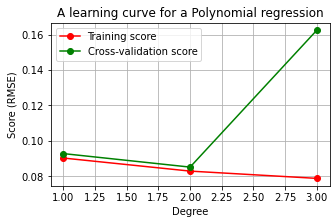

In [12]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ax.set_title('A learning curve for a Polynomial regression')
ax.set_xlabel("Degree")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(degree_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(degree_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

In [13]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)

#### Training and test data split

training RMSE:  [0.08797106 0.08997609 0.09013293 0.09015443 0.08998905 0.08994131
 0.09000272 0.09057573 0.09042288 0.09093324]
testing RMSE:  [0.09452184 0.095182   0.09540136 0.09481474 0.09425107 0.09388102
 0.09382943 0.09368181 0.09366134 0.09373373]


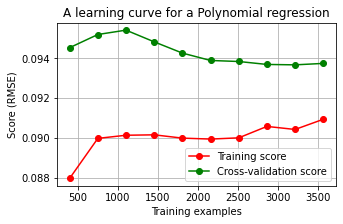

In [14]:
from sklearn.model_selection import learning_curve
    
# change the parameter values for range of lower and upper bound of training data size
# and the number of iterations, and see the changes in the learning curve. 

linreg_poly = LinearRegression()

train_sizes = np.linspace(0.1, 0.90, 10)

train_sizes, train_mse, test_mse = \
            learning_curve(linreg_poly, X, y, scoring='neg_mean_squared_error', 
                           train_sizes = train_sizes, cv=10, shuffle=True, random_state=1)
    
train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))
#print(train_scores)
#print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)
print("training RMSE: ",train_scores_mean)
print("testing RMSE: ", test_scores_mean)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for a Polynomial regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)

In [16]:
linreg_poly = LinearRegression().fit(X_train, y_train)

#print('(poly deg 2) linear model coeff (w):\n{}'
 #    .format(linreg_poly.coef_))
#print('(poly deg 2) linear model intercept (b): {:.3f}'
#     .format(linreg_poly.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg_poly.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}'
     .format(linreg_poly.score(X_test, y_test)))

# make predictions on the testing set
y_pred = linreg_poly.predict(X_test)
print('(poly deg 2) RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

(poly deg 2) R-squared score (training): 0.793
(poly deg 2) R-squared score (test): 0.768
(poly deg 2) RMSE: 0.085


#### K cross validation

In [17]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(linreg_poly, X_train, y_train, cv=10)
#print(score)
#print(score.sum()/10)

#print('linear model original data intercept (b): {:.3f}'.format(linreg_poly.intercept_))
#print('linear model original data coeff (w): {}'.format(linreg_poly.coef_))

# train data R2
print('(poly deg 2) R-squared score (training): {:.3f}'.format(score.sum()/10))
# test data R2
print('(poly deg 2) R-squared score (test): {:.3f}'.format(linreg_poly.score(X_test, y_test)))

# make predictions on the testing set and print RMSE
y_pred = linreg_poly.predict(X_test)
print('(poly deg 2) RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

(poly deg 2) R-squared score (training): 0.757
(poly deg 2) R-squared score (test): 0.768
(poly deg 2) RMSE: 0.085


### Ridge Regression

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

#### Degrees

In [19]:
# change the parameter values for range of lower and upper bound of training data size
# and the number of iterations, and see the changes in the learning curve. 
degree_sizes = [1, 2, 3, 4]#, 5]
train_scores_mean = []
test_scores_mean = []
for degree in degree_sizes:
    print("degree =", degree)
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)
    #print(degree)
    
    linrig_poly = Ridge(alpha = 0.01).fit(X_train, y_train)
    
    train_score = linrig_poly.score(X_train, y_train)
    print('(poly deg ', linrig_poly, ') R-squared score (training): {:.3f}'
         .format(train_score))
    test_score = linrig_poly.score(X_test, y_test)
    print('(poly deg ', linrig_poly, ') R-squared score (test): {:.3f}'
         .format(test_score))
    
    y_pred = linrig_poly.predict(X_train)
    train_score_mean = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    print('Training RMSE: {:.3f}'.format(train_score_mean))
    train_scores_mean.append(train_score_mean)

    # make predictions on the testing set
    y_pred = linrig_poly.predict(X_test)
    test_score_mean = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('Testing RMSE: {:.3f}\n'.format(test_score_mean))
    test_scores_mean.append(test_score_mean)

degree = 1
(poly deg  Ridge(alpha=0.01) ) R-squared score (training): 0.754
(poly deg  Ridge(alpha=0.01) ) R-squared score (test): 0.724
Training RMSE: 0.090
Testing RMSE: 0.093

degree = 2
(poly deg  Ridge(alpha=0.01) ) R-squared score (training): 0.793
(poly deg  Ridge(alpha=0.01) ) R-squared score (test): 0.776
Training RMSE: 0.083
Testing RMSE: 0.084

degree = 3
(poly deg  Ridge(alpha=0.01) ) R-squared score (training): 0.824
(poly deg  Ridge(alpha=0.01) ) R-squared score (test): 0.770
Training RMSE: 0.077
Testing RMSE: 0.085

degree = 4
(poly deg  Ridge(alpha=0.01) ) R-squared score (training): 0.848
(poly deg  Ridge(alpha=0.01) ) R-squared score (test): 0.760
Training RMSE: 0.071
Testing RMSE: 0.087



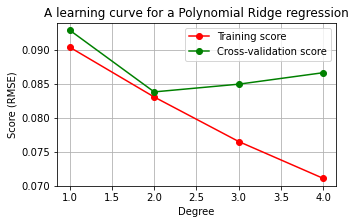

In [20]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ax.set_title('A learning curve for a Polynomial Ridge regression')
ax.set_xlabel("Degree")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(degree_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(degree_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

In [21]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)

#### alpha

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)

In [23]:
print('Ridge regression: effect of alpha regularization parameter\n')
train_scores_mean = []
test_scores_mean = []

alpha_sizes = [0, 0.0001, 0.001, 0.01, 0.02, 0.05, 0.075, 0.1,0.2,0.3,0.4, 0.5, 0.6, 0.7,0.8,0.9, 1,2,]

for this_alpha in alpha_sizes:
    linrig_poly = Ridge(alpha = this_alpha).fit(X_train, y_train)
    r2_train = linrig_poly.score(X_train, y_train)
    r2_test = linrig_poly.score(X_test, y_test)
    num_coeff_bigger = np.sum(abs(linrig_poly.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))
    
    y_pred = linrig_poly.predict(X_train)
    train_score_mean = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    print('Training RMSE: {:.3f}'.format(train_score_mean))
    train_scores_mean.append(train_score_mean)

    # make predictions on the testing set
    y_pred = linrig_poly.predict(X_test)
    test_score_mean = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('Testing RMSE: {:.3f}\n'.format(test_score_mean))
    test_scores_mean.append(test_score_mean)

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 57, r-squared training: 0.80, r-squared test: 0.77
Training RMSE: 0.082
Testing RMSE: 0.084

Alpha = 0.00
num abs(coeff) > 1.0: 51, r-squared training: 0.80, r-squared test: 0.78
Training RMSE: 0.082
Testing RMSE: 0.084

Alpha = 0.00
num abs(coeff) > 1.0: 39, r-squared training: 0.80, r-squared test: 0.78
Training RMSE: 0.082
Testing RMSE: 0.083

Alpha = 0.01
num abs(coeff) > 1.0: 11, r-squared training: 0.79, r-squared test: 0.78
Training RMSE: 0.083
Testing RMSE: 0.084

Alpha = 0.02
num abs(coeff) > 1.0: 7, r-squared training: 0.79, r-squared test: 0.77
Training RMSE: 0.084
Testing RMSE: 0.084

Alpha = 0.05
num abs(coeff) > 1.0: 6, r-squared training: 0.79, r-squared test: 0.77
Training RMSE: 0.084
Testing RMSE: 0.085

Alpha = 0.07
num abs(coeff) > 1.0: 4, r-squared training: 0.78, r-squared test: 0.76
Training RMSE: 0.085
Testing RMSE: 0.086

Alpha = 0.10
num abs(coeff) > 1.0: 4, r-squared

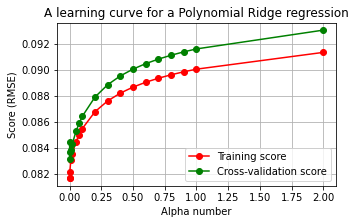

In [24]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ax.set_title('A learning curve for a Polynomial Ridge regression')
ax.set_xlabel("Alpha number")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(alpha_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(alpha_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

#### Training and Test data split

training RMSE:  [0.08829321 0.09005763 0.09017083 0.09017668 0.09000425 0.08995185
 0.09001061 0.09058182 0.09042759 0.09093699]
testing RMSE:  [0.09448705 0.09518036 0.09535508 0.09479349 0.09423852 0.09387219
 0.09382304 0.09368041 0.09365472 0.09372435]


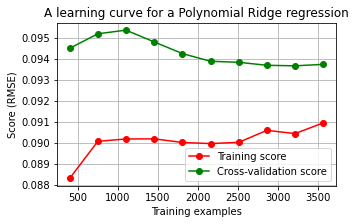

In [25]:
from sklearn.model_selection import learning_curve
    
# change the parameter values for range of lower and upper bound of training data size
# and the number of iterations, and see the changes in the learning curve. 
linrig_poly = Ridge(alpha = 0.01)

train_sizes = np.linspace(0.1, 0.90, 10)

train_sizes, train_mse, test_mse = \
            learning_curve(linrig_poly, X, y, scoring='neg_mean_squared_error', 
                           train_sizes = train_sizes, cv=10, shuffle=True, random_state=1)
    
train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))
#print(train_scores)
#print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)
print("training RMSE: ",train_scores_mean)
print("testing RMSE: ", test_scores_mean)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for a Polynomial Ridge regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)

linridge_poly = Ridge(alpha = 0.01).fit(X_train, y_train)


print('Airline dataset')

print('R-squared score (training): {:.3f}'
     .format(linridge_poly.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge_poly.score(X_test, y_test)))

# make predictions on the testing set
y_pred = linridge_poly.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

#print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
#print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

print('Number of non-zero features: {}'.format(np.sum(linridge_poly.coef_ != 0)))

Airline dataset
R-squared score (training): 0.793
R-squared score (test): 0.776
RMSE: 0.084
Number of non-zero features: 77


In [27]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(linridge_poly, X_train, y_train, cv=10)
#print(score)
#print(score.sum()/10)

#print('linear model original data intercept (b): {:.3f}'.format(linreg_poly.intercept_))
#print('linear model original data coeff (w): {}'.format(linreg_poly.coef_))

# train data R2
print('R-squared score (training): {:.3f}'.format(score.sum()/10))
# test data R2
print('R-squared score (test): {:.3f}'.format(linridge_poly.score(X_test, y_test)))

# make predictions on the testing set and print RMSE
y_pred = linridge_poly.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

R-squared score (training): 0.774
R-squared score (test): 0.776
RMSE: 0.084


### lasso Regression

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

#### Degree

In [29]:
# change the parameter values for range of lower and upper bound of training data size
# and the number of iterations, and see the changes in the learning curve. 
degree_sizes = [1, 2, 3, 4, 5, 6]#, 7, 8, 9]

train_scores_mean = []
test_scores_mean = []

for degree in degree_sizes:
    print("degree =", degree)
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)
    
    linlasso_poly = Lasso(alpha = 0.000001).fit(X_train, y_train)

    train_score = linlasso_poly.score(X_train, y_train)
    print('(poly deg ', linlasso_poly, ') R-squared score (training): {:.3f}'
         .format(train_score))
    test_score = linlasso_poly.score(X_test, y_test)
    print('(poly deg ', linlasso_poly, ') R-squared score (test): {:.3f}'
         .format(test_score))
    
    y_pred = linlasso_poly.predict(X_train)
    train_score_mean = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    print('Training RMSE: {:.3f}'.format(train_score_mean))
    train_scores_mean.append(train_score_mean)

    # make predictions on the testing set
    y_pred = linlasso_poly.predict(X_test)
    test_score_mean = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('Testing RMSE: {:.3f}\n'.format(test_score_mean))
    test_scores_mean.append(test_score_mean)

degree = 1
(poly deg  Lasso(alpha=1e-06) ) R-squared score (training): 0.755
(poly deg  Lasso(alpha=1e-06) ) R-squared score (test): 0.724
Training RMSE: 0.090
Testing RMSE: 0.093

degree = 2
(poly deg  Lasso(alpha=1e-06) ) R-squared score (training): 0.793
(poly deg  Lasso(alpha=1e-06) ) R-squared score (test): 0.777
Training RMSE: 0.083
Testing RMSE: 0.084

degree = 3
(poly deg  Lasso(alpha=1e-06) ) R-squared score (training): 0.819
(poly deg  Lasso(alpha=1e-06) ) R-squared score (test): 0.773
Training RMSE: 0.078
Testing RMSE: 0.084

degree = 4
(poly deg  Lasso(alpha=1e-06) ) R-squared score (training): 0.830
(poly deg  Lasso(alpha=1e-06) ) R-squared score (test): 0.763
Training RMSE: 0.075
Testing RMSE: 0.086

degree = 5
(poly deg  Lasso(alpha=1e-06) ) R-squared score (training): 0.838
(poly deg  Lasso(alpha=1e-06) ) R-squared score (test): 0.732
Training RMSE: 0.073
Testing RMSE: 0.092

degree = 6
(poly deg  Lasso(alpha=1e-06) ) R-squared score (training): 0.845
(poly deg  Lasso(a

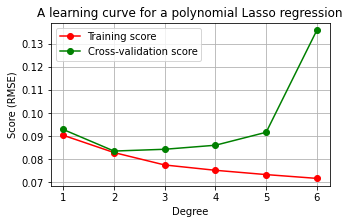

In [30]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ax.set_title('A learning curve for a polynomial Lasso regression')
ax.set_xlabel("Degree")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(degree_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(degree_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

In [31]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)

#### alpha

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)

In [33]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

train_scores_mean = []
test_scores_mean = []

#alpha_sizes = [0.0, 0.001, 0.01, 0.025, 0.05, 0.075, 0.25, 0.5, 1, 5]
alpha_sizes =  [0.0, 0.0000001,0.0000005,0.000001,0.000005, 0.00001,0.00005, 0.0001]

for alpha in alpha_sizes:
    linlasso_poly = Lasso(alpha, max_iter = 10000).fit(X_train, y_train)
    r2_train = linlasso_poly.score(X_train, y_train)
    r2_test = linlasso_poly.score(X_test, y_test)
    
    print('Alpha = {:.8f}\nFeatures kept: {}, r-squared training: {:.8f}, \
r-squared test: {:.8f}'
         .format(alpha, np.sum(linlasso_poly.coef_ != 0), r2_train, r2_test))
    
    y_pred = linlasso_poly.predict(X_train)
    train_score_mean = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    print('Training RMSE: {:.5f}'.format(train_score_mean))
    train_scores_mean.append(train_score_mean)

    # make predictions on the testing set
    y_pred = linlasso_poly.predict(X_test)
    test_score_mean = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('Testing RMSE: {:.5f}\n'.format(test_score_mean))
    test_scores_mean.append(test_score_mean)

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.00000000
Features kept: 77, r-squared training: 0.79768431, r-squared test: 0.77301654
Training RMSE: 0.08206
Testing RMSE: 0.08432

Alpha = 0.00000010
Features kept: 76, r-squared training: 0.79771821, r-squared test: 0.77456077
Training RMSE: 0.08206
Testing RMSE: 0.08403

Alpha = 0.00000050
Features kept: 72, r-squared training: 0.79723327, r-squared test: 0.77747560
Training RMSE: 0.08216
Testing RMSE: 0.08348

Alpha = 0.00000100
Features kept: 64, r-squared training: 0.79635152, r-squared test: 0.77788379
Training RMSE: 0.08233
Testing RMSE: 0.08341

Alpha = 0.00000500
Features kept: 45, r-squared training: 0.79129953, r-squared test: 0.77489583
Training RMSE: 0.08335
Testing RMSE: 0.08397

Alpha = 0.00001000
Features kept: 41, r-squared training: 0.78780492, r-squared test: 0.77172622
Training RMSE: 0.08404
Testing RMSE: 0.08455

Alpha = 0.00005000
Features kept: 22, r-

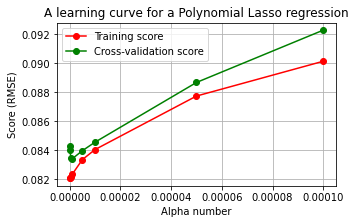

In [34]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ax.set_title('A learning curve for a Polynomial Lasso regression')
ax.set_xlabel("Alpha number")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(alpha_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(alpha_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

#### training and test split

training RMSE:  [0.08978535 0.09013308 0.09035372 0.09008659 0.09006698 0.09014008
 0.09043721 0.09056646 0.09050067 0.09093338]
testing RMSE:  [0.09523997 0.09540034 0.09491063 0.09438289 0.0938961  0.09391817
 0.09354175 0.09375116 0.09362185 0.09372925]


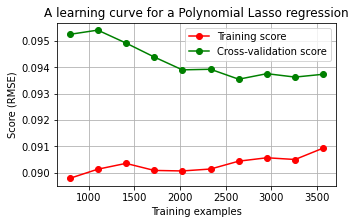

In [35]:
from sklearn.model_selection import learning_curve
    
# change the parameter values for range of lower and upper bound of training data size
# and the number of iterations, and see the changes in the learning curve. 

linlasso_poly = Lasso(alpha = 0.000001)

train_sizes = np.linspace(0.2, 0.90, 10)

train_sizes, train_mse, test_mse = \
            learning_curve(linlasso_poly, X, y, scoring='neg_mean_squared_error', 
                           train_sizes = train_sizes, cv=10, shuffle=True, random_state=1)
    
train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))
#print(train_scores)
#print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)
print("training RMSE: ",train_scores_mean)
print("testing RMSE: ", test_scores_mean)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for a Polynomial Lasso regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y,
                                                   random_state = 0)

linlasso_poly = Lasso(alpha = 0.000001).fit(X_train, y_train)

print('Airline dataset')

print('R-squared score (training): {:.3f}'
     .format(linlasso_poly.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linlasso_poly.score(X_test, y_test)))

# make predictions on the testing set
y_pred = linlasso_poly.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    
#print('lasso regression linear model intercept: {}'.format(linlasso.intercept_))
#print('lasso regression linear model coeff:\n{}'.format(linlasso.coef_))

print('Non-zero features: {}\n'.format(np.sum(linlasso_poly.coef_ != 0)))
 
#print('Features with non-zero weight (sorted by absolute magnitude):')
#for e in sorted (list(zip(list(X), linlasso.coef_)),
 #               key = lambda e: -abs(e[1])):
  #  if e[1] != 0:
   #     print('\t{}, {:.3f}'.format(e[0], e[1]))

Airline dataset
R-squared score (training): 0.793
R-squared score (test): 0.777
RMSE: 0.084
Non-zero features: 72



In [37]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(linlasso_poly, X_train, y_train, cv=10)
#print(score)
#print(score.sum()/10)

#print('linear model original data intercept (b): {:.3f}'.format(linreg_poly.intercept_))
#print('linear model original data coeff (w): {}'.format(linreg_poly.coef_))

# train data R2
print('R-squared score (training): {:.3f}'.format(score.sum()/10))
# test data R2
print('R-squared score (test): {:.3f}'.format(linlasso_poly.score(X_test, y_test)))

# make predictions on the testing set and print RMSE
y_pred = linlasso_poly.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

R-squared score (training): 0.771
R-squared score (test): 0.777
RMSE: 0.084
